Deepface
Face Recognition
Face Analysis - Age, gender, emotion etc.
https://pypi.org/project/deepface/


In [ ]:
!pip install dlib
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 357.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=47244f8bde416ac069e030afe98d8b0dcdb67c2f0ebd8a91d1e23c2487ebb189
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
import cv2
import os
import dlib
from deepface import DeepFace

24-01-15 00:17:27 - Directory /root/.deepface created
24-01-15 00:17:27 - Directory /root/.deepface/weights created


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab.patches import cv2_imshow # for image display

In [ ]:
passport_number = input("Enter passenger's Passport Number :-")
image = (f"/{passport_number}.jpg")
result1 = DeepFace.verify(img1_path = "/content/gdrive/MyDrive/Project 2/Resources/Sample-20240114T181038Z-001/Sample/Current Image"+image, img2_path = "/content/gdrive/MyDrive/Project 2/Resources/Sample-20240114T181038Z-001/Sample/PP Image"+image)

face_verification_result = result1['verified']

if face_verification_result is True:
  print("Face recognition test passed")
else:
  print("Face recognition test failed")



Enter passenger's Passport Number :-12631334
Face recognition test failed


24-01-15 00:24:29 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 43.9MB/s]


24-01-15 00:24:31 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:01<00:00, 296MB/s]


24-01-15 00:24:36 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:01<00:00, 276MB/s]


24-01-15 00:24:41 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:01<00:00, 311MB/s]
Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.89it/s]


domain emotion is neutral
neutral
[{'emotion': {'angry': 1.5374711714684963, 'disgust': 5.52072236814638e-06, 'fear': 0.07785303751006722, 'happy': 0.8934412151575089, 'sad': 8.148279786109924, 'surprise': 0.0019448314560577273, 'neutral': 89.34100866317749}, 'dominant_emotion': 'neutral', 'region': {'x': 161, 'y': 287, 'w': 704, 'h': 704}, 'face_confidence': 11.21823010162916}, {'emotion': {'angry': 1.5548604540526867, 'disgust': 7.441165053023724e-05, 'fear': 0.6607961375266314, 'happy': 93.47851872444153, 'sad': 0.10247653117403388, 'surprise': 3.147660940885544, 'neutral': 1.0556128807365894}, 'dominant_emotion': 'happy', 'region': {'x': 495, 'y': 1362, 'w': 47, 'h': 47}, 'face_confidence': 2.570273118733894}]


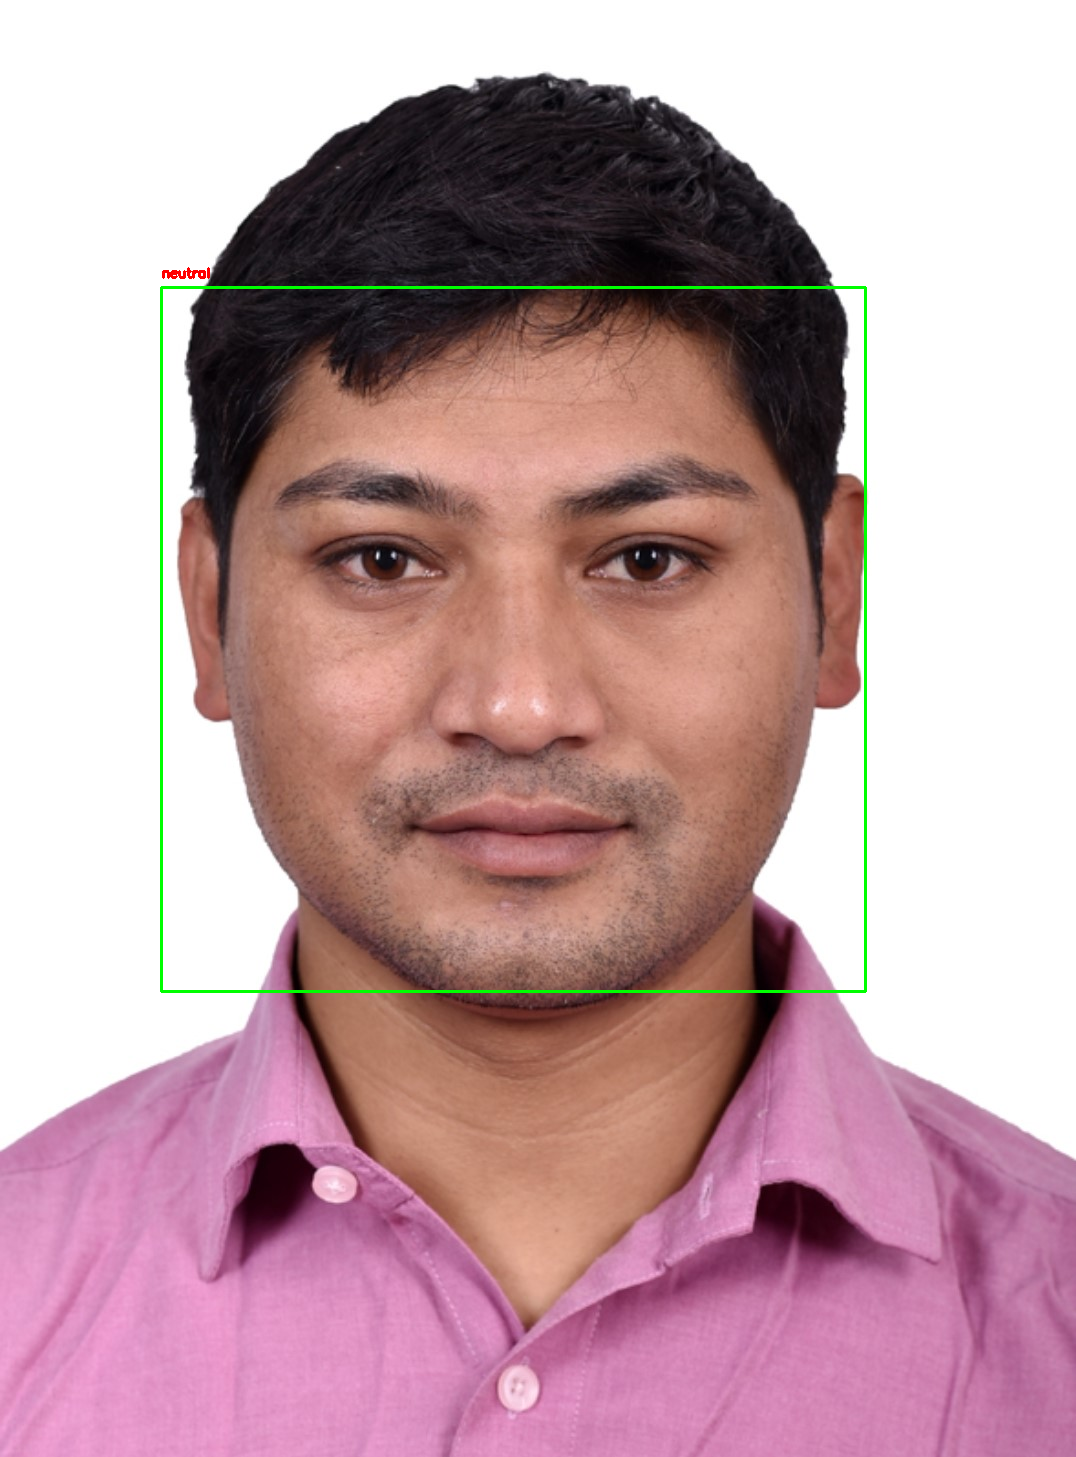

In [ ]:
from google.colab.patches import cv2_imshow
from deepface import DeepFace
import cv2

result2 = DeepFace.analyze("/content/gdrive/MyDrive/Project 2/Resources/Sample-20240114T181038Z-001/Sample/Current Image"+image)
first_result = result2[0]
face_emotion_result = first_result['dominant_emotion']

print(f"domain emotion is {face_emotion_result}")

name = "/Ticket No.01 C.jpg"
frame = cv2.imread("/content/gdrive/MyDrive/Project 2/Resources/Sample-20240114T181038Z-001/Sample/Current Image"+image)

try:
    res = DeepFace.analyze(frame, actions=['emotion'])
    print(res[0]['dominant_emotion'])
    print(res)  # Print the entire result to examine its structure

    # Draw rectangles around faces
    x = int(res[0]['region']['x'])
    y = int(res[0]['region']['y'])
    w = int(res[0]['region']['w'] + x)
    h = int(res[0]['region']['h'] + y)
    cv2.rectangle(frame, (x, y), (w, h), (0, 255, 0), 2)

    text = res[0]['dominant_emotion']
    startY = y
    startX = x
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(frame, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    cv2_imshow(frame)

except Exception as e:
    print(e)



In [ ]:
'''except Exception as e:
    print(e)'''

'except Exception as e:\n    print(e)'